**Задание**

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

**Признаки:**
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

# Импорт необходимых библиотек и модулей

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Задание 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
hr_df = pd.read_csv('HR.csv')
pd.DataFrame(hr_df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Задание 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
# Рассчитываем основные статистики для числовых столбцов

numeric_cols = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]

mean_values = hr_df[numeric_cols].mean().round(2)
median_values = hr_df[numeric_cols].median().round(2)
mode_values = hr_df[numeric_cols].mode().iloc[0].round(2)
min_values = hr_df[numeric_cols].min().round(2)
max_values = hr_df[numeric_cols].max().round(2)
std_values = hr_df[numeric_cols].std().round(2)

stats = pd.DataFrame({
    "Среднее": mean_values,
    "Медиана": median_values,
    "Мода": mode_values,
    "Минимум": min_values,
    "Максимум": max_values,
    "Сред. отклонение": std_values
})

pd.DataFrame(stats)

,Среднее,Медиана,Мода,Минимум,Максимум,Сред. отклонение
satisfaction_level,0.61,0.64,0.10,0.09,1.0,0.25
last_evaluation,0.72,0.72,0.55,0.36,1.0,0.17
number_project,3.80,4.00,4.00,2.00,7.0,1.23
average_montly_hours,201.05,200.00,135.00,96.00,310.0,49.94
time_spend_company,3.50,3.00,3.00,2.00,10.0,1.46


In [4]:
# Рассчитываем основные статистики для категориальных столбцов

categorical_cols = ["Work_accident", "left", "promotion_last_5years", "department", "salary"]

hr_df[categorical_cols].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


# Задание 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

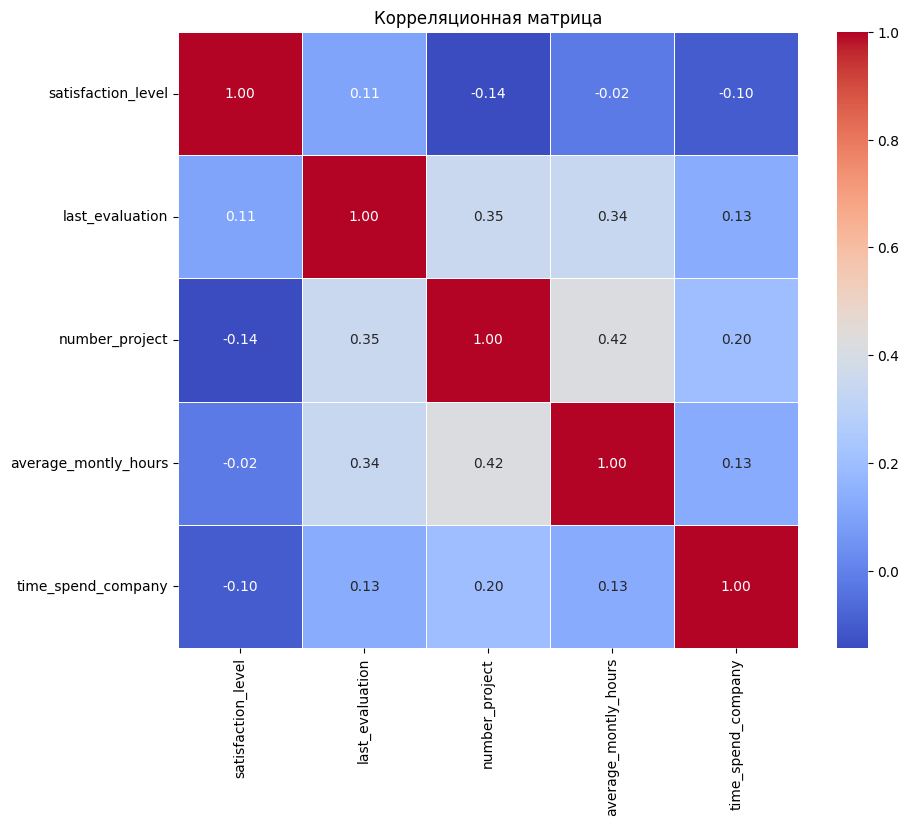

Самые сильно скоррелированные переменные: (('number_project', 'average_montly_hours'), 0.41721063440177986)
Самые слабо скоррелированные переменные: (('satisfaction_level', 'number_project'), -0.14296958603690096)


In [6]:
# Вычисляем корреляционную матрицу для количественных переменных
corr_matrix = hr_df[numeric_cols].corr()

# Визуализируем корреляционную матрицу с помощью heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Находим две наиболее скоррелированные и две наименее скоррелированные переменные
corr_matrix_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
most_correlated = corr_matrix_no_diag.unstack().idxmax(), corr_matrix_no_diag.max().max()
least_correlated = corr_matrix_no_diag.unstack().idxmin(), corr_matrix_no_diag.min().min()

print(f"Самые сильно скоррелированные переменные: {most_correlated}")
print(f"Самые слабо скоррелированные переменные: {least_correlated}")

# Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [7]:
hr_df.groupby('department').size()

,0
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


# Задание 5. Показать распределение сотрудников по зарплатам

In [8]:
hr_df.salary.value_counts()

,count
salary,
low,7316
medium,6446
high,1237


# Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [9]:
hr_df.pivot_table(index='department', columns='salary', aggfunc='size')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


# Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [12]:
# Разделяем данные по уровню зарплаты
low_salary = hr_df[hr_df["salary"] == "low"]["average_montly_hours"]
high_salary = hr_df[hr_df["salary"] == "high"]["average_montly_hours"]

# Вычисляем среднее время на работе для каждой группы
mean_low = low_salary.mean()
mean_high = high_salary.mean()

# Выполняем t-тест
t_stat, p_value = ttest_ind(low_salary, high_salary, equal_var=False)

# Вывод результатов
print(f"Среднее количество часов (low salary): {mean_low:.2f}")
print(f"Среднее количество часов (high salary): {mean_high:.2f}")
print(f"t-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")

# Интерпретация результата
if p_value < 0.05:
    print("Разница статистически значима: сотрудники с разной зарплатой проводят разное время на работе.")
else:
    print("Нет статистически значимой разницы: сотрудники с низкой и высокой зарплатой работают примерно одинаково.")

Среднее количество часов (low salary): 201.00
Среднее количество часов (high salary): 199.87
t-статистика: 0.762
p-значение: 0.446
Нет статистически значимой разницы: сотрудники с низкой и высокой зарплатой работают примерно одинаково.


# Задание 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов

In [16]:
# Группируем сотрудников по статусу увольнения
left_group = hr_df[hr_df["left"] == 1]
stayed_group = hr_df[hr_df["left"] == 0]

# Доля сотрудников с повышением за последние 5 лет
promotion_left = left_group["promotion_last_5years"].mean()
promotion_stayed = stayed_group["promotion_last_5years"].mean()

# Средняя степень удовлетворенности
satisfaction_left = left_group["satisfaction_level"].mean()
satisfaction_stayed = stayed_group["satisfaction_level"].mean()

# Среднее количество проектов
projects_left = left_group["number_project"].mean()
projects_stayed = stayed_group["number_project"].mean()

# Вывод результатов
print("Доля сотрудников с повышением за последние 5 лет:")
print(f"  Уволившиеся: {promotion_left:.3%}")
print(f"  Оставшиеся: {promotion_stayed:.3%}")

print("\nСредняя степень удовлетворенности:")
print(f"  Уволившиеся: {satisfaction_left:.3f}")
print(f"  Оставшиеся: {satisfaction_stayed:.3f}")

print("\nСреднее количество проектов:")
print(f"  Уволившиеся: {projects_left:.3f}")
print(f"  Оставшиеся: {projects_stayed:.3f}")

Доля сотрудников с повышением за последние 5 лет:
  Уволившиеся: 0.532%
  Оставшиеся: 2.625%

Средняя степень удовлетворенности:
  Уволившиеся: 0.440
  Оставшиеся: 0.667

Среднее количество проектов:
  Уволившиеся: 3.856
  Оставшиеся: 3.787


# Задание 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке

In [26]:
X = hr_df.iloc[:,[0,1,2,3,4,5,7]]
y = hr_df['left']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Строим модель LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Делаем предсказание на тестовых данных
model.predict(X_test)

# Оцениваем точность модели
round(accuracy_score(y_test, model.predict(X_test)), 2)
# Точность модели высокая

0.76